In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [5]:
data="data/cleaned_tabular.csv"
df=pd.read_csv(data)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.501142,0.677402,0.178963,-0.290276,-0.144952,0.922943,0,-0.306964,-0.626000,-0.557611,-0.345663,-0.207964,12.581985,-0.900034,0.192759,-0.473911,-0.129791
1,12.409018,-0.394132,0.505667,-0.521813,-0.311135,0.922943,0,-0.306964,0.908842,-0.557611,0.709771,-0.207964,12.591252,-1.137139,0.192759,-0.385919,-0.339019
2,12.206078,0.677402,0.505667,-0.389506,-0.160457,0.922943,0,-0.306964,-0.626000,0.296350,0.777864,-0.207964,12.531108,-2.098571,-0.706669,-0.165941,-0.196068
3,12.772806,-1.465666,0.178963,-0.918734,-0.364787,0.922943,0,-0.306964,-0.626000,-0.557611,1.288558,-0.207964,13.257362,-0.206791,1.006527,-1.089851,-0.445025
4,12.354497,-0.394132,-0.147741,-0.874632,-0.038936,-0.918626,0,-0.306964,-0.626000,-0.557611,0.777864,-0.207964,12.605452,-1.367738,0.999388,-0.576568,-0.173196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,12.842652,-0.394132,-0.801150,-1.183348,-0.204862,-0.918626,0,-0.306964,-0.626000,-0.557611,-0.822311,-0.207964,12.987940,1.111021,-0.749499,-1.441817,-0.214930
16205,12.899097,-0.394132,0.505667,1.117691,-0.254109,0.922943,0,-0.306964,-0.626000,0.296350,1.458789,-0.207964,12.523093,-1.903393,-0.963648,1.384176,-0.280428
16206,13.262127,-0.394132,0.505667,0.051517,-0.259827,0.922943,0,-0.306964,-0.626000,-0.557611,1.118326,-0.207964,13.330295,0.869579,1.299198,-0.429915,-0.374478
16207,12.409018,-2.537201,-1.781262,-1.866934,0.003408,-0.918626,0,-0.306964,-0.626000,-2.265534,-0.277571,-0.207964,12.356950,-0.576183,-0.778052,-1.192508,0.084078


# Price Distrubution

Text(0, 0.5, 'count')

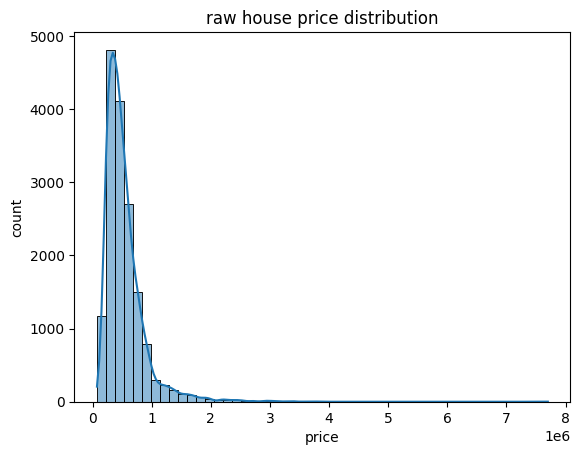

In [10]:
sns.histplot(np.expm1(df["price"]),bins=50,kde=True)
plt.title("raw house price distribution")
plt.xlabel("price")
plt.ylabel("count")


Text(0, 0.5, 'count')

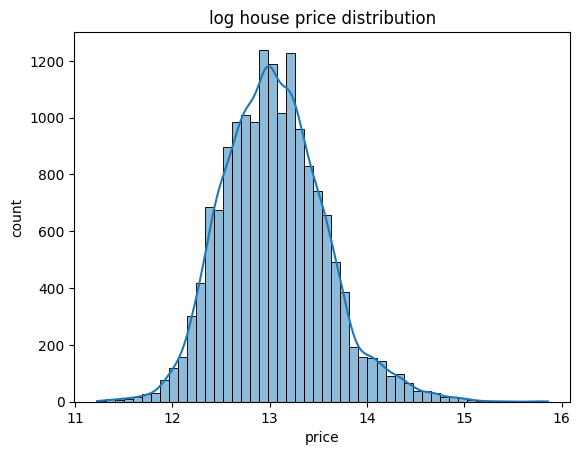

In [11]:
sns.histplot(df["price"],bins=50,kde=True)
plt.title("log house price distribution")
plt.xlabel("price")
plt.ylabel("count")


# Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap of tabular features')

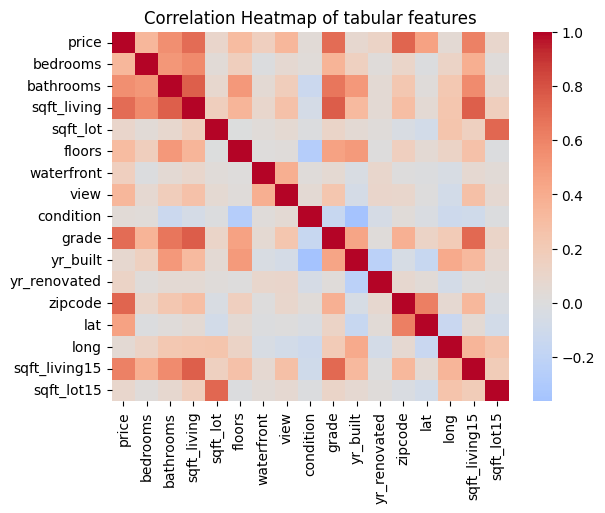

In [13]:
corr=df.corr()
sns.heatmap(corr,cmap="coolwarm",center=0)
plt.title("Correlation Heatmap of tabular features")

# Location X Price

Text(0.5, 1.0, 'Geopraphical Distrubution of house prices')

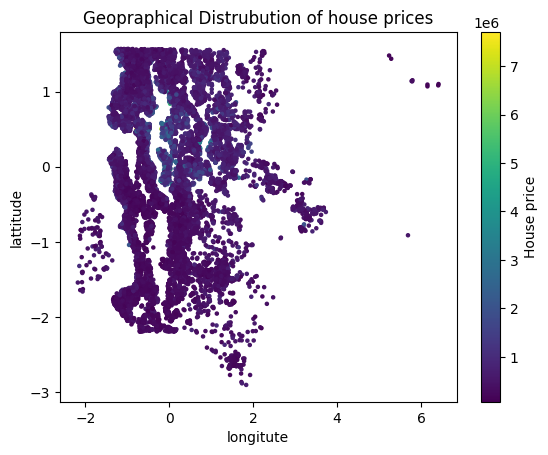

In [15]:
plt.scatter(
    df["long"],df["lat"],c=np.expm1(df["price"]),cmap="viridis",s=5
)
plt.colorbar(label="House price")
plt.xlabel("longitute")
plt.ylabel("lattitude")
plt.title("Geopraphical Distrubution of house prices")

# Feature X Price

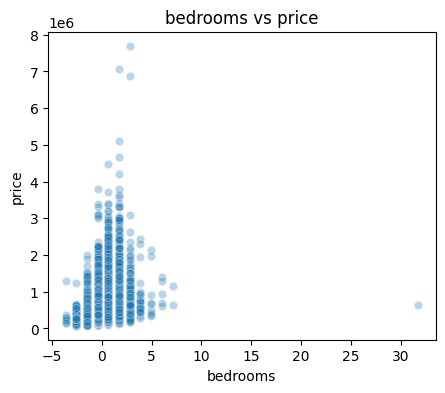

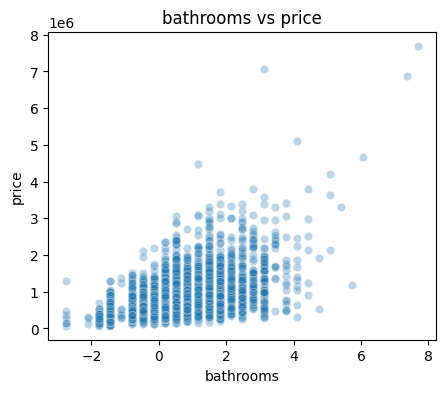

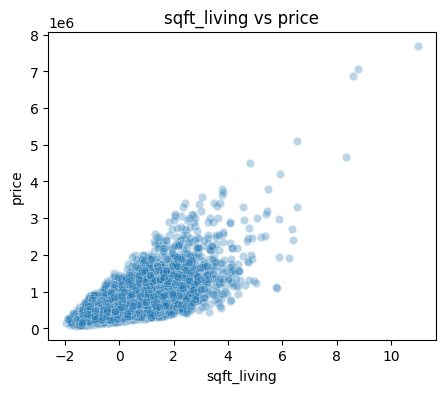

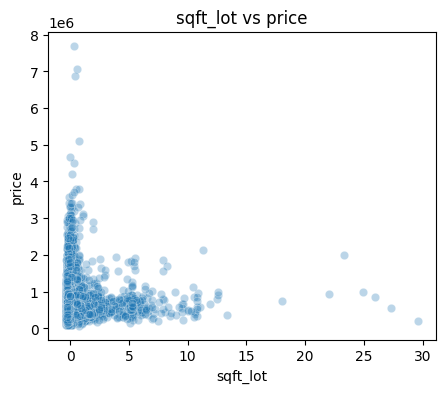

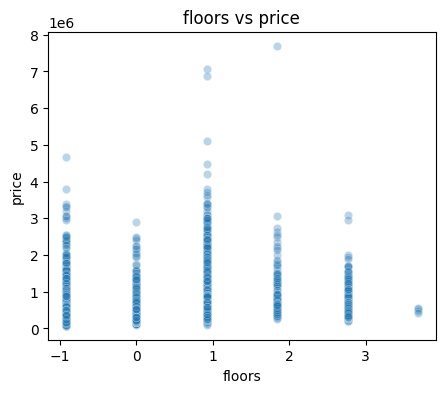

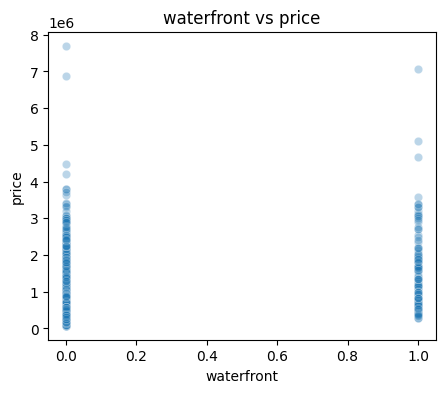

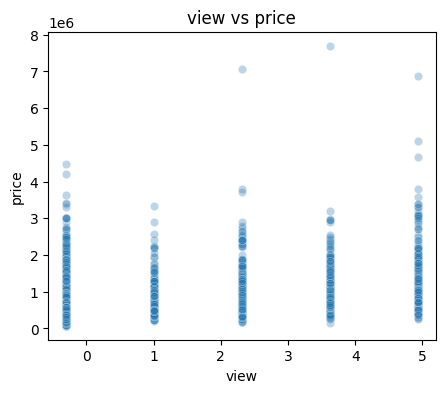

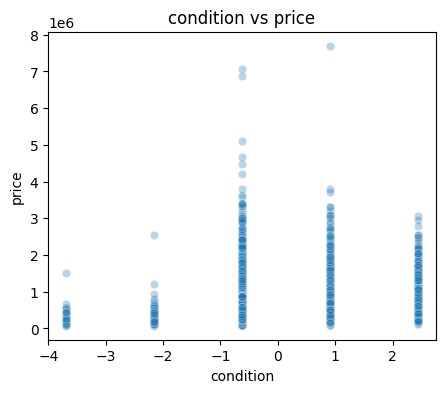

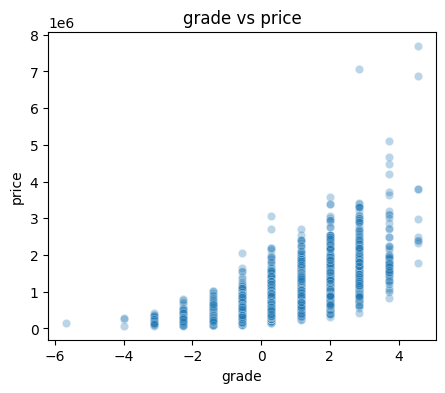

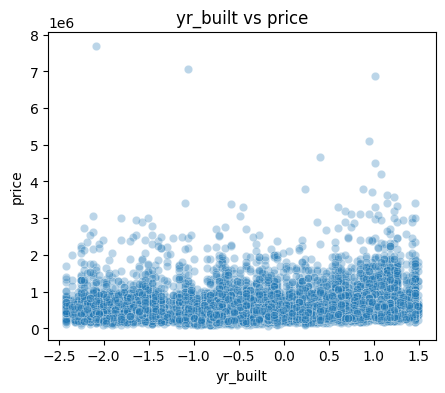

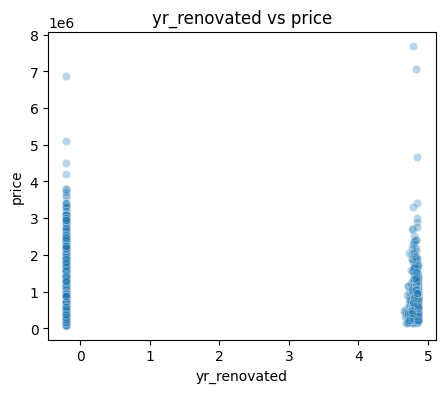

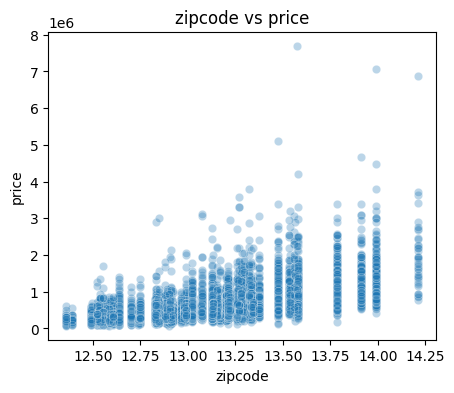

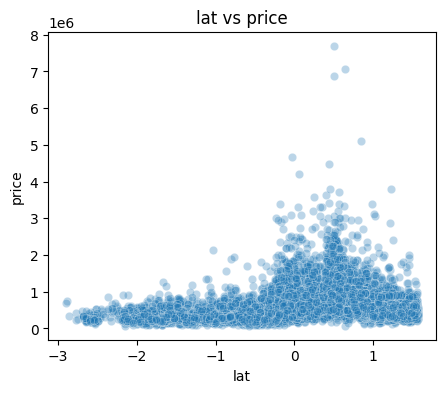

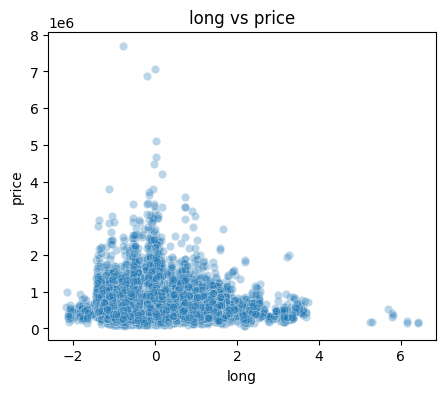

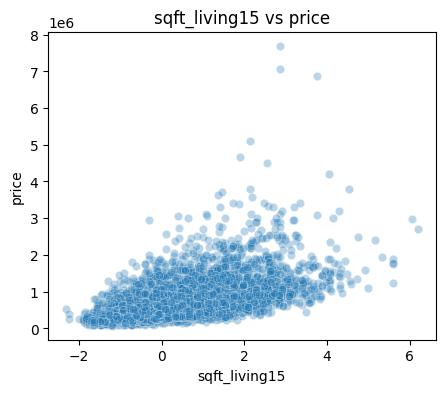

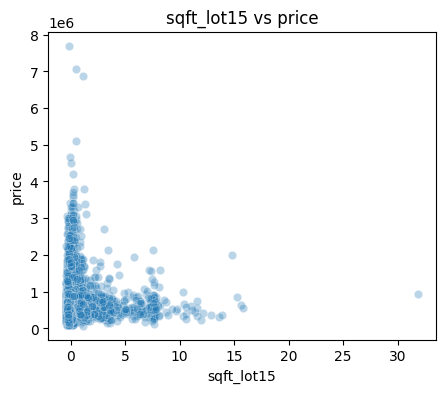

In [18]:
features=df.drop(columns=["price"]).columns
for fea in features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[fea],y=np.expm1(df["price"]),alpha=0.3)
    plt.title(f"{fea} vs price")

# Satellite Images Samples

Text(0.5, 0.98, 'Sample Satellite Images ')

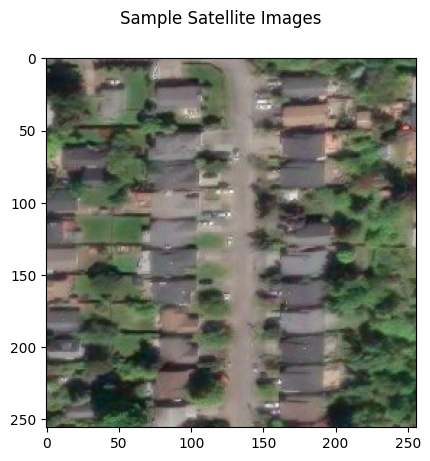

In [41]:
import random
from PIL import Image
IMAGE_DIR="data/arcgis_images"
sample_ids=random.sample((range(len(df))),9)
for i,idx in enumerate(sample_ids):
    img=Image.open(f"{IMAGE_DIR}/{idx}.jpg")
    plt.imshow(img)

plt.suptitle("Sample Satellite Images ")